In [2]:
from tensorflow import keras

from keras import Sequential,layers,models
from keras.datasets import mnist


In [3]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
import visualkeras
import seaborn as sb

image tag :  5


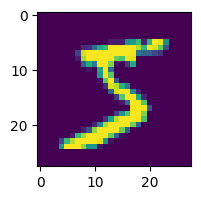

image tag :  0


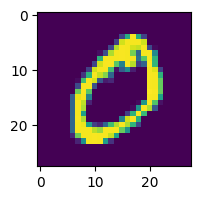

image tag :  4


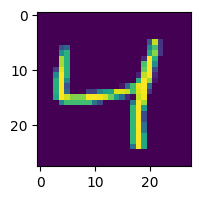

image tag :  1


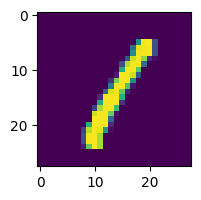

image tag :  9


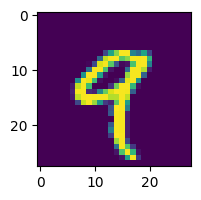

image tag :  2


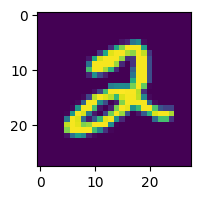

image tag :  1


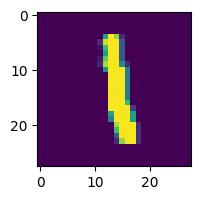

image tag :  3


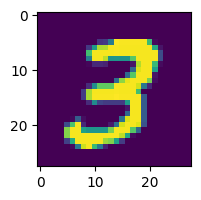

image tag :  1


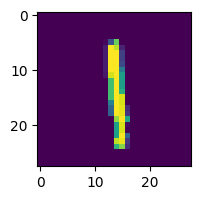

image tag :  4


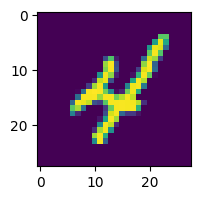

image tag :  3


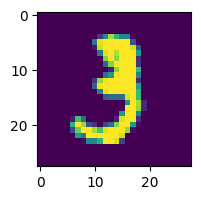

In [4]:
(x_train , y_train) , (x_test,y_test) = mnist.load_data()
x_train =  x_train/255.0
x_test =  x_test/255.0

for i in range(0,11):
    print("image tag : ",y_train[i])
    plt.figure(figsize=(2,2))
    plt.imshow(x_train[i])
    plt.show()


(10000,)
(60000,)


<Figure size 10000x10000 with 0 Axes>

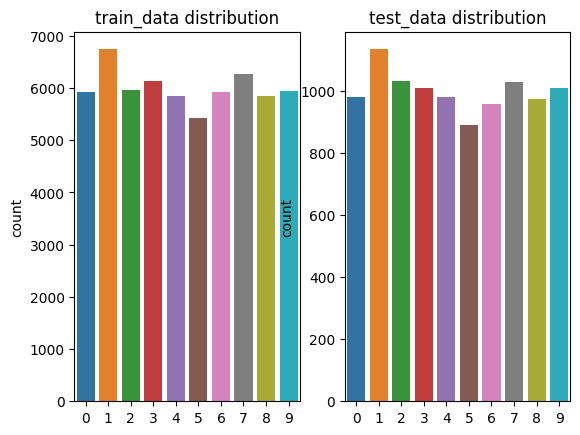

In [33]:
fig, ax = plt.subplots(nrows=1, ncols=2)

sb.countplot(x=y_train,ax=ax[0])
ax[0].set_title('train_data distribution')
sb.countplot(x=y_test,ax=ax[1])
ax[1].set_title('test_data distribution')

plt.show()

In [35]:
x_train = x_train.reshape(x_train.shape[0],x_train[0].shape[0],x_train[0].shape[1],1)
x_test = x_test.reshape(x_test.shape[0],x_test[0].shape[0],x_test[0].shape[1],1)
print(x_train.shape)
print(x_test.shape)


(60000, 28, 28, 1)
(10000, 28, 28, 1)


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 3, 3, 64)          36928     
                                                                 
 flatten_1 (Flatten)         (None, 576)              

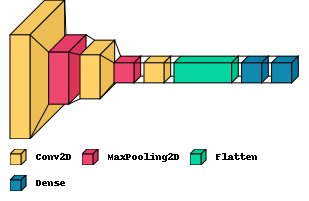

In [51]:
model = Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])
print(model.summary())
visualkeras.layered_view(model,legend=True)


In [52]:

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


validation_split = 0.2

validation_size = int(len(x_train) * validation_split)

history = model.fit(x_train[:-validation_size], y_train[:-validation_size],
                    epochs=10,
                    batch_size=64,
                    validation_data=(x_train[-validation_size:], y_train[-validation_size:]))

model.save("CNN.h5")

Epoch 1/10
750/750 [==============================] - 26s 33ms/step - loss: 0.2137 - accuracy: 0.9360 - val_loss: 0.0937 - val_accuracy: 0.9697
Epoch 2/10
750/750 [==============================] - 26s 35ms/step - loss: 0.0541 - accuracy: 0.9833 - val_loss: 0.0473 - val_accuracy: 0.9862
Epoch 3/10
750/750 [==============================] - 33s 44ms/step - loss: 0.0387 - accuracy: 0.9880 - val_loss: 0.0418 - val_accuracy: 0.9868
Epoch 4/10
750/750 [==============================] - 35s 47ms/step - loss: 0.0293 - accuracy: 0.9905 - val_loss: 0.0385 - val_accuracy: 0.9893
Epoch 5/10
750/750 [==============================] - 45s 60ms/step - loss: 0.0223 - accuracy: 0.9931 - val_loss: 0.0399 - val_accuracy: 0.9884
Epoch 6/10
750/750 [==============================] - 48s 64ms/step - loss: 0.0192 - accuracy: 0.9938 - val_loss: 0.0362 - val_accuracy: 0.9895
Epoch 7/10
750/750 [==============================] - 45s 60ms/step - loss: 0.0157 - accuracy: 0.9948 - val_loss: 0.0332 - val_accuracy:

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


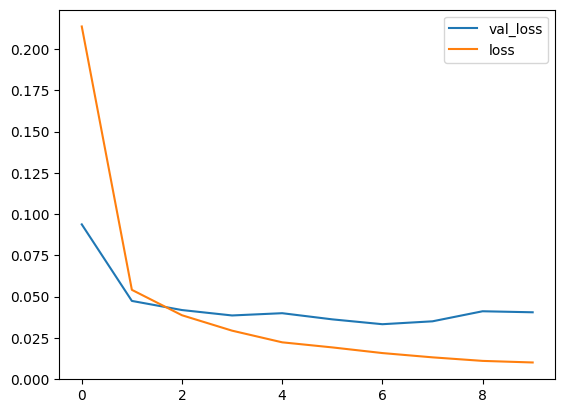

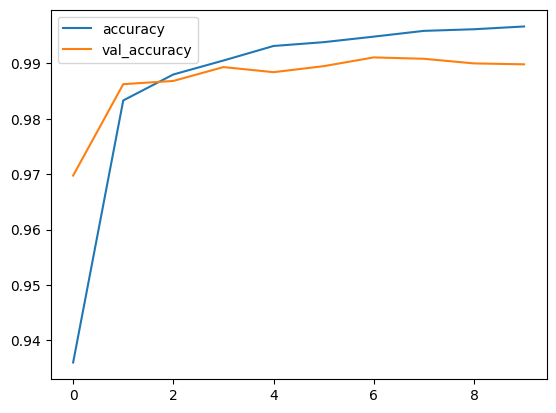

In [56]:
print(history.history.keys())
loss = history.history["loss"]
val_loss = history.history["val_loss"]
accuracy = history.history["accuracy"]
val_accuracy = history.history["val_accuracy"]
x = [i for i in range(1,11)]
plt.plot(val_loss,label="val_loss")
plt.plot(loss,    label="loss" )
plt.legend()
plt.show()
plt.plot(accuracy,label="accuracy")
plt.plot(val_accuracy,    label="val_accuracy" )
plt.legend()
plt.show()